C:\Users\ewzbusi\Desktop\repos\sktime\sktime\transformations\series\detrend\mstl.py:219: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column_name, column_data in mstl.seasonal.iteritems():


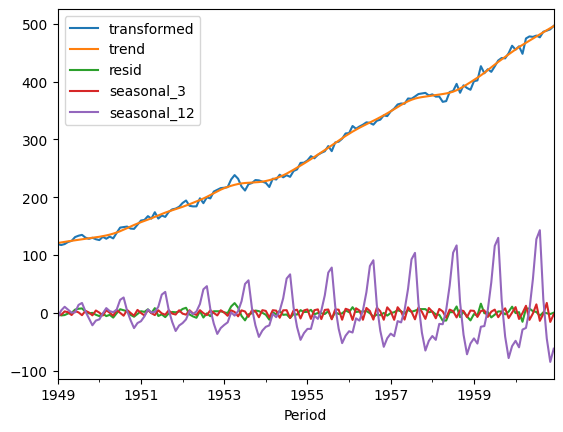

In [17]:
import matplotlib.pyplot as plt  
from sktime.datasets import load_airline
from sktime.transformations.series.detrend.mstl import MSTL


y = load_airline()
y.index = y.index.to_timestamp()
mstl = MSTL(periods=[3,12],return_components=True)  
fitted = mstl.fit(y)  
res = fitted.transform(y)  
res.plot()   
plt.show() 

In [22]:
for i in mstl.seasonal_.columns:
    print(mstl.seasonal_[i])

Period
1949-01-01     1.309070
1949-02-01    -3.531810
1949-03-01     2.487008
1949-04-01     1.033097
1949-05-01    -3.775078
                ...    
1960-08-01   -13.866788
1960-09-01    -1.848749
1960-10-01    17.157415
1960-11-01   -15.707845
1960-12-01    -2.505060
Freq: MS, Name: seasonal_3, Length: 144, dtype: float64
Period
1949-01-01     -8.217532
1949-02-01      4.165178
1949-03-01     10.476878
1949-04-01      5.294849
1949-05-01      0.237226
                 ...    
1960-08-01    143.047549
1960-09-01     23.352396
1960-10-01    -44.610001
1960-11-01    -84.956413
1960-12-01    -62.065237
Freq: MS, Name: seasonal_12, Length: 144, dtype: float64


In [7]:
mstl.seasonal_.seasonal_7 

Period
1949-01-01     0.191198
1949-02-01   -11.963954
1949-03-01    -3.178365
1949-04-01    -2.997757
1949-05-01     2.210765
                ...    
1960-08-01    36.754908
1960-09-01    12.635617
1960-10-01    10.226930
1960-11-01   -44.993643
1960-12-01   -35.975857
Freq: MS, Name: seasonal_7, Length: 144, dtype: float64

In [ ]:
#I don't really get the problem here. The seasonal component can be extracted. 

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

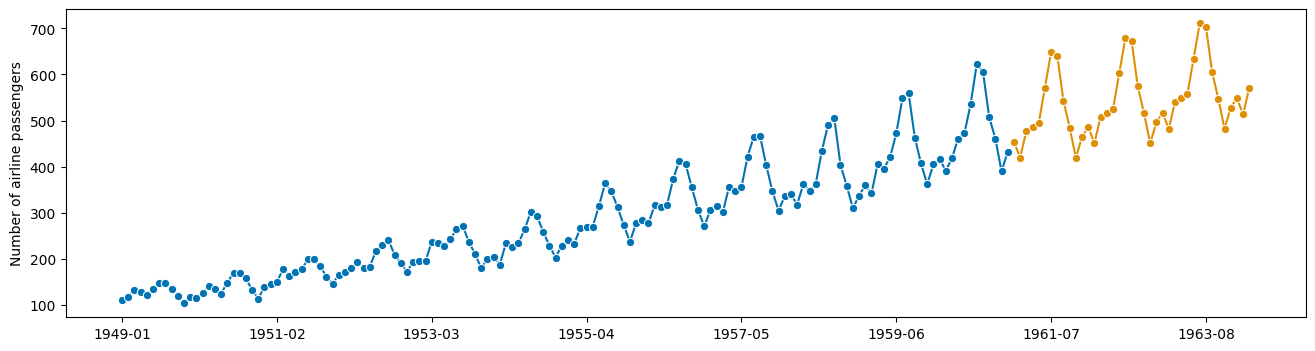

In [13]:
from sktime.datasets import load_airline
from sktime.forecasting.statsforecast import StatsForecastMSTL
from sktime.utils.plotting import plot_series
import numpy as np

y = load_airline()
model = StatsForecastMSTL(season_length=[3,12]) 
fitted_model = model.fit(y=y) 
y_pred = fitted_model.predict(fh=np.arange(1,40)) 
plot_series(y,y_pred)